# YOLOv8 demo - trained model

In [1]:
# Import YOLOv8
from ultralytics import YOLO

# Import image visualization
import cv2

In [2]:
# Get list of files
import os
folder_path = 'test2017'
files = os.listdir(folder_path)

## Original image

test2017/000000577602.jpg


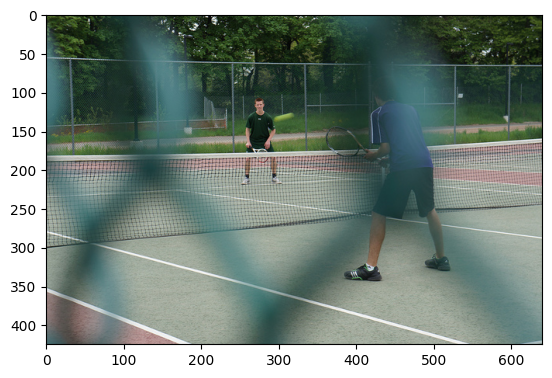

In [3]:
# Select random file
import random

random_filename = f"{folder_path}/{random.choice(files)}"
print(random_filename)

# Show original image
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread(random_filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Classification

In [4]:
# Selectclassification pretrained model
model = YOLO('yolov8l-cls.pt')

# Score and show results
results = model(random_filename) 

import yaml

# Get classess
with open('imagenet_classes.yaml', 'r') as f:
    classes_dict = yaml.safe_load(f)

classes = classes_dict['names']

# Print most probable class
classes[results[0].probs.top1]


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000577602.jpg: 224x224 racket 0.74, ping-pong_ball 0.25, tennis_ball 0.01, chainlink_fence 0.00, soccer_ball 0.00, 7.8ms
Speed: 11.3ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


'racket'

In [5]:
model.info(detailed=True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False         1728        [64, 3, 3, 3]    -0.0422       3.02 torch.float32
    1                        model.0.conv.bias     False           64                 [64]      0.869       3.12 torch.float32
    2                      model.1.conv.weight     False        73728      [128, 64, 3, 3]  -0.000464     0.0397 torch.float32
    3                        model.1.conv.bias     False          128                [128]       1.47       2.78 torch.float32
    4                  model.2.cv1.conv.weight     False        16384     [128, 128, 1, 1]   -0.00702     0.0967 torch.float32
    5                    model.2.cv1.conv.bias     False          128                [128]       1.18       1.61 torch.float32
    6                  model.2.cv2.conv.weight     False        40960     [128, 320, 1, 1]   -0.00232     0.0299 torch.float3

(133, 37465576, 0, 0.0)

## Object detection

100%|██████████| 83.7M/83.7M [00:01<00:00, 47.0MB/s]

image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000577602.jpg: 448x640 2 persons, 1 sports ball, 2 tennis rackets, 55.5ms
Speed: 1.0ms preprocess, 55.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


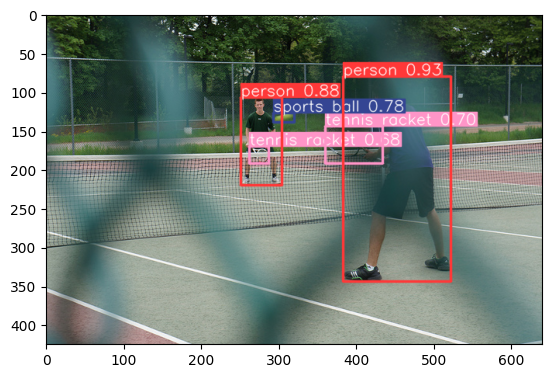

In [6]:
# Select object detection pretrained model
model = YOLO('yolov8l.pt')

# Score and show results
results = model(random_filename) 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

# Segment detection

100%|██████████| 88.1M/88.1M [00:01<00:00, 49.9MB/s]

image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000577602.jpg: 448x640 2 persons, 1 sports ball, 4 tennis rackets, 62.1ms
Speed: 0.9ms preprocess, 62.1ms inference, 42.3ms postprocess per image at shape (1, 3, 448, 640)


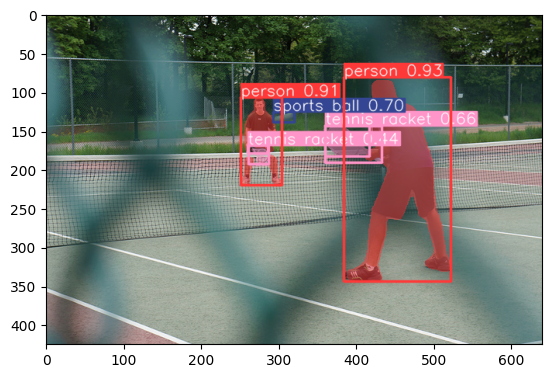

In [7]:
# Select segment detection pretrained model
model = YOLO('yolov8l-seg.pt')

# Score and show results
results = model(random_filename) 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

# Pose detection

100%|██████████| 85.3M/85.3M [00:01<00:00, 46.4MB/s]

image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000577602.jpg: 448x640 2 persons, 53.4ms
Speed: 1.1ms preprocess, 53.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


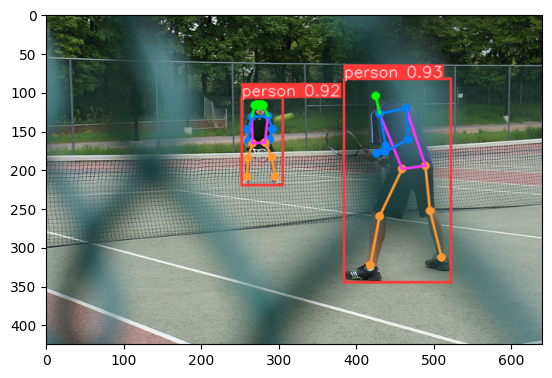

In [8]:
# Select pose detection pretrained model
model = YOLO('yolov8l-pose.pt')

# Score and show results
results = model(random_filename) 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))